# Deep Learning in Medicine
### BMSC-GA 4493, BMIN-GA 3007 
### Homework 2



**Note:** If you need to write mathematical terms, you can type your answeres in a Markdown Cell via LaTex 

See: <a href="https://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook">here</a> if you have issues. To see basic LaTex notation see: <a href="https://en.wikibooks.org/wiki/LaTeX/Mathematics"> here </a>.

**Submission instruction**: Upload and Submit your final jupyter notebook with necessary files in <a href='http://newclasses.nyu.edu'>newclasses.nyu.edu</a>. If you use code or script from web, please give a link to the code in your answers.

**Submission deadline:** Friday March 9th 2018 (5:00 PM)

# Question 1: Convolutional Layer  (Total 28 points)

We have a 3x6x6 image and two 3x3x3 convolution kernels as pictured. Bias term for each feature map is also provided. For the questions 1.2., 1.3. and 1.5., in addition to providing the maps, please provide the python code (without using pytorch package) that you used to calculate the maps

<img src="Picture1.png" width="500">

## 1.1) 
What will be the dimension of the feature maps after we forward propogate the image using the given convolution kernels for

### 1.1.a) (2 points)
stride=1, without zero padding?

2x4x4

### 1.1.b) (2 points)
stride=2, without zero padding?

2x2x2

### 1.1.c) (2 points) 
stride=2, with zero padding?

2x3x3

### 1.1.d) (2 points)
stride=3, with zero padding?

2x2x2

### 1.1.e) (2 points) 
a dilated convolution with stride=1, dilation rate=2 and zero padding?

2x4x4

## 1.2) (4 points)  
Calculate the feature maps for the case stride=2, with zero padding. 

In [1]:
# starter code to load image:x, kernel weights:w and bias:b
import numpy as np
npzfile = np.load('Question1.npz') # 'Question1.npz' is provided under /beegfs/ga4493/data/HW2 folder at HPC
print(npzfile.files) # check the variable names
x = npzfile['x']
w = npzfile['w']
b = npzfile['b']

['x', 'b', 'w']


In [2]:
# there are many ways of achieving this, below is one example
stride = 2

x_zeropad = np.zeros([x.shape[0],x.shape[1]+2,x.shape[2]+2])
x_zeropad[:,1:-1,1:-1] = x

tmp = np.zeros([w.shape[0],x_zeropad.shape[1],x_zeropad.shape[2]])
for xi in range(0,x_zeropad.shape[1]-2,stride):
    for yi in range(0,x_zeropad.shape[2]-2,stride):
        x_crop = x_zeropad[:,xi:xi+w.shape[1],yi:yi+w.shape[2]]
        elementwise_dot = np.multiply(x_crop,w)
        for fi in range(0,elementwise_dot.shape[0]):
            tmp[fi,xi,yi] = np.sum(elementwise_dot[fi])+b[fi]

features = tmp[:,0:-2:stride,0:-2:stride]

print('Feature maps\n',features)

Feature maps
 [[[  4.  11.  -4.]
  [  7.   4. -11.]
  [  1.  -1.  13.]]

 [[ -9.   9.  -3.]
  [  0.  -7.  -3.]
  [ 10.   1.  -2.]]]


## 1.3) 
Apply the following activation function on the feature maps calculated in 1.2 and provide the resulting activation maps

### 1.3.a) (1 point)
ReLU

In [3]:
## ReLU is defined as max(0,x)
features_flat = features.flatten()
relu = np.zeros(features_flat.shape)
for xi in range(0,len(features_flat)):
    if features_flat[xi] <=0:
        relu[xi] = 0
    else:
        relu[xi]=features_flat[xi]

relu = np.reshape(relu,features.shape)
print('ReLU activation maps\n',relu)

ReLU activation maps
 [[[ 4. 11.  0.]
  [ 7.  4.  0.]
  [ 1.  0. 13.]]

 [[ 0.  9.  0.]
  [ 0.  0.  0.]
  [10.  1.  0.]]]


### 1.3.b) (2 points)
leaky ReLu with negative slope coefficient = 0.01

In [4]:
## leaky ReLU is defined as alpha*x for x<0 and x for x>0
features_flat = features.flatten()
leakyrelu = np.zeros(features_flat.shape)
for xi in range(0,len(features_flat)):
    if features_flat[xi] <=0:
        leakyrelu[xi] = 0.01*features_flat[xi]
    else:
        leakyrelu[xi]=features_flat[xi]

leakyrelu = np.reshape(leakyrelu,features.shape)
print('Leaky ReLU activation maps\n',leakyrelu)

Leaky ReLU activation maps
 [[[ 4.0e+00  1.1e+01 -4.0e-02]
  [ 7.0e+00  4.0e+00 -1.1e-01]
  [ 1.0e+00 -1.0e-02  1.3e+01]]

 [[-9.0e-02  9.0e+00 -3.0e-02]
  [ 0.0e+00 -7.0e-02 -3.0e-02]
  [ 1.0e+01  1.0e+00 -2.0e-02]]]


## 1.4) (3 points)
List three pooling strategies, write their mathematical forms for 2D inputs

Output $S$ for input $I$ and for kernel $K$ of size $k_{i}$x$k_{j}$

1) Max pooling

$S(i,j)=max_{m=0}^{k_{i}-1}max_{n=0}^{k_{j}-1}I(i+m,j+n)$

2) Average pooling

$S(i,j)=\frac{1}{k_{i}*k_{j}}\sum_{m=0}^{k_{i}-1}\sum_{n=0}^{k_{j}-1}I(i+m,j+n)$

3) L2 norm pooling

$S(i,j)=\sqrt{\sum_{m=0}^{k_{i}-1}\sum_{n=0}^{k_{j}-1}I(i+m,j+n)^2}$

## 1.5)
Pick two out of three pooling strategies and provide the output features by applying it to the activation maps obtained in 1.3.b for 

### 1.5.a) (2 points)
pool width=2 and stride 1

In [5]:
def maxpool(inp, width, stride):
    tmp=np.zeros([inp.shape[0],inp.shape[1],inp.shape[2]])
    for xi in range(0,inp.shape[1]-width+1,stride):
        for yi in range(0,inp.shape[2]-width+1,stride):
            for fi in range(0,inp.shape[0]):
                tmp[fi,xi,yi] = np.amax(inp[fi,xi:xi+width,yi:yi+width])
    return tmp[:,0:inp.shape[1]-width+1:stride,0:inp.shape[2]-width+1:stride]

def avgpool(inp, width, stride):
    tmp=np.zeros([inp.shape[0],inp.shape[1],inp.shape[2]])
    for xi in range(0,inp.shape[1]-width+1,stride):
        for yi in range(0,inp.shape[2]-width+1,stride):
            for fi in range(0,inp.shape[0]):
                tmp[fi,xi,yi] = np.sum(inp[fi,xi:xi+width,yi:yi+width])/len(inp[fi,xi:xi+width,yi:yi+width].flatten())
    return tmp[:,0:inp.shape[1]-width+1:stride,0:inp.shape[2]-width+1:stride]

from numpy import linalg as LA
def L2pool(inp, width, stride):
    tmp=np.zeros([inp.shape[0],inp.shape[1],inp.shape[2]])
    for xi in range(0,inp.shape[1]-width+1,stride):
        for yi in range(0,inp.shape[2]-width+1,stride):
            for fi in range(0,inp.shape[0]):
                tmp[fi,xi,yi] = LA.norm(inp[fi,xi:xi+width,yi:yi+width].flatten())
    return tmp[:,0:inp.shape[1]-width+1:stride,0:inp.shape[2]-width+1:stride]

print('MaxPooling Output')
print(maxpool(leakyrelu,2,1))
print('Average Pooling Output')
print(avgpool(leakyrelu,2,1))
print('L2 Pooling Output')
print(L2pool(leakyrelu,2,1))

MaxPooling Output
[[[11. 11.]
  [ 7. 13.]]

 [[ 9.  9.]
  [10.  1.]]]
Average Pooling Output
[[[6.5    3.7125]
  [2.9975 4.22  ]]

 [[2.21   2.2175]
  [2.7325 0.22  ]]]
L2 Pooling Output
[[[14.2126704  11.70528513]
  [ 8.12404456 13.60191898]]

 [[ 9.00072219  9.00037221]
  [10.0501194   1.00309521]]]


### 1.5.b) (2 points) 
pool width=3 and stride 1

In [6]:
print('MaxPooling Output')
print(maxpool(leakyrelu,3,1))
print('Average Pooling Output')
print(avgpool(leakyrelu,3,1))
print('L2 Pooling Output')
print(L2pool(leakyrelu,3,1))

MaxPooling Output
[[[13.]]

 [[10.]]]
Average Pooling Output
[[[4.42666667]]

 [[2.19555556]]]
L2 Pooling Output
[[[19.28765927]]

 [[13.4913009 ]]]


## 1.6) (4 points)
Here we will use the pytorch package to calculate feature/activation maps. Write a code which takes 3x6x6 image and performs a 2D convolution operation (with stride=2 and zero padding) using 3x3x3 filters provided on the picture. After convolution layer use leacky ReLU activation function (with negative slope 0.01) and L2-pooling operation (pool width = 2 and stride = 1). Provide the code, feature maps obtained from convolution operation (compare with 1.2.), activation maps (compare with 1.3.b), and feature maps after L2-pooling operation.

In [7]:
import torch
from torch.autograd import Variable

# define convolution operator
conv2d = torch.nn.Conv2d(in_channels=3, out_channels=2, kernel_size=(3,3), stride=(2,2), padding=(1,1))

# use predefined weights and biases
weightsInTorch = torch.from_numpy(w)
weightsInTorch = weightsInTorch.type(torch.FloatTensor)
conv2d.weight.data = weightsInTorch

biasInTorch = torch.from_numpy(b.flatten())
biasInTorch = biasInTorch.type(torch.FloatTensor)
conv2d.bias.data = biasInTorch

image = Variable(torch.from_numpy((x[np.newaxis,:])), requires_grad=False)
image=image.type(torch.FloatTensor) 

# apply convolution operation
convImage=conv2d(image)
print('Feature Maps')
print(convImage)


# define activation operator
leakyRelu = torch.nn.LeakyReLU()
# apply convolution operation
activation=leakyRelu(convImage)
print('Activation Maps after leaky Relu')
print(activation)

# define maxpooling operator
maxpool = torch.nn.LPPool2d(2,kernel_size=(2,2),stride=(1,1))
# apply convolution operation
output=maxpool(activation)
print('Feature maps after maxpool layer')
print(output)


Feature Maps
Variable containing:
(0 ,0 ,.,.) = 
   4  11  -4
   7   4 -11
   1  -1  13

(0 ,1 ,.,.) = 
  -9   9  -3
   0  -7  -3
  10   1  -2
[torch.FloatTensor of size 1x2x3x3]

Activation Maps after leaky Relu
Variable containing:
(0 ,0 ,.,.) = 
   4.0000  11.0000  -0.0400
   7.0000   4.0000  -0.1100
   1.0000  -0.0100  13.0000

(0 ,1 ,.,.) = 
  -0.0900   9.0000  -0.0300
   0.0000  -0.0700  -0.0300
  10.0000   1.0000  -0.0200
[torch.FloatTensor of size 1x2x3x3]

Feature maps after maxpool layer
Variable containing:
(0 ,0 ,.,.) = 
  14.2127  11.7053
   8.1240  13.6019

(0 ,1 ,.,.) = 
   9.0007   9.0004
  10.0501   1.0031
[torch.FloatTensor of size 1x2x2x2]



# Question 2: Network design for disease classification (Total 26 points)

Disease classification is a common problem in medicine. There are many ways to solve this problem. Goal of this question is to make sure that you have a clear picture in your mind about possible techniques that you can use in such a classification task.

Assume that we have a 10K images in a dataset of x-rays. For each image, the dimension is 128x128 and we have the label for each image. Label of each image defines which class the image belongs (lets assume we have 10 disease classes in total). You will describe your approach of classifying the disease for the techniques below. Make sure you do not forget the bias term. You can either design your proposed network by explaining it explicitely or you can provide the pytorch code which designs the network for questions 2.1.a, 2.2.a, and 2.3.a


### 2.1.a) (2 points)
Design a multi-class logistic regression model which takes an image as input (by reshaping it to a vector: lets call this a vectorized image) and outputs to get the probability of 10 disease classes. 

In [8]:
import torch

# you can generate a random image tensor for batch_size 8
x = torch.Tensor(8,1,128,128).normal_().type(torch.FloatTensor)
x = Variable(x, requires_grad=False)

model = torch.nn.Linear(in_features=128*128, out_features=10, bias=True)
model

Linear(in_features=16384, out_features=10, bias=True)

### 2.1.b) (2 points)
Clearly mention the sizes for your input and output

input size is 128*128 since each pixel requires a variable to fit

output size is 10 since we have 10 disease classes

### 2.1.c) (1 point)
What type of activation function you will use and why?

Logistic regression finds a model achieving y=Wx+b, when we talk about activation functions we have the formula y=$sigma$(Wx+b) where $sigma$ is the activation function. For a logistic regression model, we can think Identity function as an activation function

### 2.1.d) (1 point)
How many parameters you need to fit for your design?

we need out_features x in_features weights and out_features biases, so in total: 16384x10+10=163850 parameters we need to fit. Check http://pytorch.org/docs/0.3.1/nn.html#linear 

In [9]:
#Also, you can use model.parameters() to calculate number of trainable parameters as well
#Using the function from: https://discuss.pytorch.org/t/how-do-i-check-the-number-of-parameters-of-a-model/4325/7
        
def get_n_params(model):
    pp=0
    for p in list(model.parameters()):
        nn=1
        for s in list(p.size()):
            nn = nn*s
        pp += nn
    return pp

print('We need this many parameters to fit: ', get_n_params(model))

We need this many parameters to fit:  163850


### 2.2.a) (2 points)
Design a one layer multi layer perceptron (MLP) which first maps the vectorized images to a vector of 128 then feeds this vector to a fully connected layer to get the probability of 10 disease classes. 

In [10]:
import torch.nn as nn
import torch.nn.functional as F

class MLPNet(nn.Module):
    def __init__(self):
        super(MLPNet, self).__init__()
        self.fc1 = nn.Linear(128*128, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.contiguous().view(-1,128*128)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
 
model = MLPNet().double()

### 2.2.b) (2 points)
Clearly mention the sizes for your input and output at each layer until you get final output vector with 10 probabilities

In [11]:
model

MLPNet(
  (fc1): Linear(in_features=16384, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

### 2.2.c) (2 points) 
Define two types of activation functions you can use in the first layer. Which activation function you will use on the second fully connected layer?

In the first layer, we can use relu, leaky relu, elu, selu ... check available activation functions: http://pytorch.org/docs/0.3.1/nn.html#non-linear-activations
We do not need an activation function for the last layer, you can still think Identity as the last activation function

### 2.2.d) (1 points)
How many parameters you need to fit for your design? How does adding another hidden layer effected the number of parameters to use?

In [12]:
print('We need this many parameters to fit: ', get_n_params(model))
# The number of parameters increased significantly by adding an additional fully connected hidden layer, 
# now we have almost 13 times more parameters to fit

We need this many parameters to fit:  2098570


### 2.3.a) (2 points)
Design a one layer convolutional neural network which first maps the images to a vector of 128 (with the help of convolution and pooling operations) then feeds this vector to a fully connected layer to get the probability of 10 disease classes.

In [13]:
class Convnet(nn.Module):
    def __init__(self):
        super(Convnet, self).__init__()
        shape = 128
        stride = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=128, kernel_size=(3,3), stride=(2,2), padding=(1,1))
        shape = shape//stride
        self.pool1 = nn.MaxPool2d(kernel_size=(2,2),stride=(2,2))
        shape = shape//stride
        self.flat_size = 128 * shape * shape
        self.fc1 = nn.Linear(self.flat_size, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.fc1(x)
        return x
    
model = Convnet().double()

### 2.3.b) (2 points)
Clearly mention the sizes for your input, kernel, pooling, and output at each step until you get final output vector with 10 probabilities

In [14]:
stride=2
print('Input size: ', x.shape)
conv1=nn.Conv2d(in_channels=1, out_channels=128, kernel_size=(3,3), stride=stride, padding=(1,1))
print('After convolution size: ', conv1(x).shape)
pool1 = nn.MaxPool2d(kernel_size=(2,2),stride=stride)
print('After pool size: ', pool1(conv1(x)).shape)
print('Output size is: 10')

Input size:  torch.Size([8, 1, 128, 128])
After convolution size:  torch.Size([8, 128, 64, 64])
After pool size:  torch.Size([8, 128, 32, 32])
Output size is: 10


### 2.3.c) (1 points) 
How many parameters you need to fit for your design?

In [15]:
print('We need this many parameters to fit: ', get_n_params(model))

We need this many parameters to fit:  1312010


### 2.3.d) (2 points)
Now increase your selected convolution kernel size by 2 in each direction. Describe the effect of using small vs large filter size during convolution. 

In [16]:
class Convnet(nn.Module):
    def __init__(self):
        super(Convnet, self).__init__()
        shape = 128
        stride = 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=128, kernel_size=(5,5), stride=stride, padding=(1,1))
        shape = shape//stride
        self.pool1 = nn.MaxPool2d(kernel_size=(2,2),stride=stride)
        shape = shape//stride
        self.flat_size = 128 * shape * shape
        self.fc1 = nn.Linear(self.flat_size, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.fc1(x)
        return x
    
model = Convnet().double()
print('We need this many parameters to fit: ', get_n_params(model))

# slight increase in the number of parameters to fit, 
# larger filter size results in larger receptive field in convolutions.

We need this many parameters to fit:  1314058


### 2.3.e) (3 points)
Now multiply your selected stride size for convolution and pooling operation by 2. Describe the effect of this change in design criteria in terms of memory requirements, number of parameters to fit and number of operations.

In [17]:
class Convnet(nn.Module):
    def __init__(self):
        super(Convnet, self).__init__()
        shape = 128
        stride = 4
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=128, kernel_size=(3,3), stride=stride, padding=(1,1))
        shape = shape//stride
        self.pool1 = nn.MaxPool2d(kernel_size=(2,2),stride=stride)
        shape = shape//stride
        self.flat_size = 128 * shape * shape
        self.fc1 = nn.Linear(self.flat_size, 10)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.fc1(x)
        return x
    
model = Convnet().double()
print('We need this many parameters to fit: ', get_n_params(model))
stride = 4
print('Input size: ', x.shape)
conv1=nn.Conv2d(in_channels=1, out_channels=128, kernel_size=(3,3), stride=stride, padding=(1,1))
print('After convolution size: ', conv1(x).shape)
pool1 = nn.MaxPool2d(kernel_size=(2,2),stride=stride)
print('After pool size: ', pool1(conv1(x)).shape)
print('Output size is: 10')

# we see drop in number of parameters to fit. thic will decrease mamory requirements
# stride also decreases the number of operations

We need this many parameters to fit:  83210
Input size:  torch.Size([8, 1, 128, 128])
After convolution size:  torch.Size([8, 128, 32, 32])
After pool size:  torch.Size([8, 128, 8, 8])
Output size is: 10


### 2.3.f) (3 points)
Assume we trained the designed network and we want to classify the disease from a image of size 256x192.  and we want to use your designed network for inference. Describe if your designed CNN is capable of accepting this image without any preprocessing. If we can not use your network with this image, please propose changes on your network which will enable accepting images of various shapes. 

Current approach is not capable of using images different size as input because of fully connected layer.
We can achive this by using specific pooling layers.
Check Figure 9.11 on the coursebook

# Question 3: Deep CNN design for disease classification (Total 56 points + 12 points in bonus question)

In this part of the howework, we will focus on classifiying the lung disease using chest x-ray dataset provided by NIH (https://www.nih.gov/news-events/news-releases/nih-clinical-center-provides-one-largest-publicly-available-chest-x-ray-datasets-scientific-community). Please go over the following paper for the details of the dataset: https://arxiv.org/pdf/1705.02315.pdf 

You need to use HPC for training part of this question, as your computer's CPU will not be fast enough to compute learning iterations. In case you use HPC, please have your code/scripts uploaded under the questions and provide the required plots and tables there as well. Data is available in HPC under /beegfs/ga4493/data/HW2 folder. We are interested in classifying infiltration, pneumothorax, cardiomegaly and *not*(infiltration OR pneumothorax OR cardiomegaly) cases. By saying so we have 4 classes that we want to identify by modelling a deep CNN.

First, you need to work on Data_Entry_2017.csv file to identify cases/images that has infiltration, pneumothorax, cardiomegaly and *not* images that doesnt have any one of 3 diseases. 

## 3.1) Train, Test, and Validation Sets (4 points)
Write a script to read data from Data_Entry_2017.csv and process to obtain 3 sets(train, validation and test). By using 'Finding Labels' column, define a class that each image belongs to, in total you can define 5 classes:
- 1 infiltration
- 2 pneumothorax
- 3 cardiomegaly
- 4 cases which contain at least two disease and at least one of them belongs to classes 1,2 and 3 
- 0 for all other diseases (doesnt have infiltration OR pneumothorax OR cardiomegaly) or NoFinding

Generate a train, validation and test set by splitting the whole dataset containing specific classes (0, 1, 2, and 3)  by 60%, 20% and 20%, respectively. Since we have too many samples on Class 0, use only random 10% of the samples for creating sets. Test set will not be used during modelling but it will be used to test your model's accuracy. Make sure you have similar percentages of different cases in each subset. Provide statistics of the number of classess in your subsets. (you do not need to think about splitting the sets based on subjects for this homework. In general, we do not want images from the same subject to appear in both train and test sets!!) 

Write a .csv files defining the samples in your train, validation and test set with names: train.csv, validation.csv, and test.csv. Submit these files with your homework. 

In [18]:
import pandas as pd, numpy as np

df = pd.read_csv('Data_Entry_2017.csv')
df = df.dropna(axis=1, how='all')
infiltration = df['Finding Labels'] == "Infiltration"
pneumothorax = df['Finding Labels'] == "Pneumothorax"
cardiomegaly = df['Finding Labels'] == "Cardiomegaly"

# this class at least have one of the diseases we are interested in 
# we will use ~ for choosing rows which do not have any disease we are interested in
anyClass = df['Finding Labels'].str.contains("Infiltration", regex=True) | df['Finding Labels'].str.contains("Pneumothorax", regex=True) | df['Finding Labels'].str.contains("Cardiomegaly", regex=True)
# select a subset of this i.e. 10%
pos = np.flatnonzero(~anyClass)
np.random.seed(1234)
subpos = np.random.choice(pos, len(pos)//10, replace=False)

# add new column that specifies the image classes
df['Class'] = 4
df.loc[subpos,'Class'] = 0 # class for all other diseases
df.loc[infiltration,'Class'] = 1 #class for infiltration
df.loc[pneumothorax,'Class'] = 2 #class for pneumothorax
df.loc[cardiomegaly,'Class'] = 3 #class for cardiomegaly
#Update df to have only classess we are interested in
notOurInterest = df['Class'] == 4
df=df[~notOurInterest]

# Selection of train, test, and validation sets with 60%, 20% and 20%, respectively.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df.Class, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, X_train.Class, test_size=0.25, random_state=0)

X_train.to_csv('HW2_trainSet.csv',index=False)
print('Train set class distribution\n', X_train['Class'].value_counts())
print('*****')
X_val.to_csv('HW2_validationSet.csv',index=False)
print('Validation set class distribution\n', X_val['Class'].value_counts())
print('*****')
X_test.to_csv('HW2_testSet.csv',index=False)
print('Test set class distribution\n', X_test['Class'].value_counts())



Train set class distribution
 1    5723
0    5184
2    1301
3     635
Name: Class, dtype: int64
*****
Validation set class distribution
 1    1885
0    1701
2     455
3     240
Name: Class, dtype: int64
*****
Test set class distribution
 1    1939
0    1686
2     438
3     218
Name: Class, dtype: int64


## 3.2) Data preparation before training (4 points)
From here on, you will use HW2_trainSet.csv, HW2_testSet.csv and HW2_validationSet.csv provided under /beegfs/ga4493/data/HW2 folder for defining train, test and validation set samples instead of the csv files you generate on Question 3.1.


There are multiple ways of using images as an input during training or validation. Here, you need to decide on one way of using images in your network. You may want to use numpy arrays as shown in Lab 4, HDF5 file format or torch Dataset class  (http://pytorch.org/tutorials/beginner/data_loading_tutorial.html). Once you decide on the way to use images as input, write necessary script which will enable you to input images in your designed CNN later. !! If you need to save anything, please use your own folder at HPC.

In [19]:
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
from skimage import io
import torch
from skimage import color

class ChestXrayDataset(Dataset):
    """Chest X-ray dataset from https://nihcc.app.box.com/v/ChestXray-NIHCC."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file filename information.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.data_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.data_frame.iloc[idx, 0])
        
        #some cases io.imread brings more channels than 1 due to bitsize issues
        image = io.imread(img_name,as_grey=True)
        #or we can use the following
        #if len(image.shape) > 2 and image.shape[2] == 4:
        #    image = image[:,:,0]
        
        # data transfrom to zero mean unit variance
        image = (image - image.mean()) / image.std()
            
        image_class = self.data_frame.iloc[idx, -1]
        #print(img_name,image.shape)

        sample = {'x': image[None,:], 'y': image_class}

        if self.transform:
            sample = self.transform(sample)

        return sample

Since now we can import images for model training, next step is to define a CNN model that you will use to train disease classification task. Any model requires us to select model parameters like how many layers, what is the kernel size, how many feature maps and so on. The number of possible models is infinite, but we need to make some design choices to start.  Lets design a CNN model with 5 convolutional layers and a fully connected layer followed by a classification layer. Lets use 

-  3x3 convolution kernels
-  ReLU for an activation function
-  max pooling with kernel 2x2 and stride 2. 

Define the number of feature maps in hidden layers as: 16, 16, 32, 32, 64, 32 (1st layer, ..., 6th layer). 

## 3.3) CNN model definition (4 points)
Write a class which specifies this network details.

In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Convnet5Layer(nn.Module,):
    def __init__(self,fc_size=32):
        super(Convnet5Layer, self).__init__()

        self.conv1 = nn.Sequential(         # image shape (1, 1024, 1024)
            nn.Conv2d(
                in_channels=1,              # number of input channels
                out_channels=16,            # number of output filters
                kernel_size=3,              # filter size yo ucan also specify it as (3,3)
                stride=1,                   # stride ofor the conv operation
                padding=1,                  # if want same width and length of this image after con2d
            ),                              # output shape (16, 1024, 1024)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 512, 512)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 16, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),    # output shape (16, 256, 256)
        )
        
        self.conv3 = nn.Sequential(
            nn.Conv2d(16, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),    # output shape (32, 128, 128)
        )
        
        self.conv4 = nn.Sequential(
            nn.Conv2d(32, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),    # output shape (32, 64, 64)
        )
        
        self.conv5 = nn.Sequential(
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),    # output shape (64, 32, 32)
        )
        
        self.fc = nn.Linear(64 * 32 * 32 , fc_size)
        
        self.out = nn.Linear(fc_size , 4)


    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc(x))
        x = self.out(x)
        return x

model = Convnet5Layer()
print(model)

Convnet5Layer(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (conv5): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2

## 3.4) (4 points)
How many learnable parameters of this model has? How many learnable parameters we would have if we only have 5 convolutional layers without a fully connected 6th layer in our network? Describe why the fully connected layer needs so much trainable parameters, and provide additional suggestions to mitigate this?

In [21]:
print('We need this many parameters to fit for the original model: ', get_n_params(model))

class Convnet5LayerNoFC(nn.Module):
    def __init__(self):
        super(Convnet5LayerNoFC, self).__init__()

        self.conv1 = nn.Sequential(         # image shape (1, 1024, 1024)
            nn.Conv2d(
                in_channels=1,              # number of input channels
                out_channels=16,            # number of output filters
                kernel_size=3,              # filter size yo ucan also specify it as (3,3)
                stride=1,                   # stride ofor the conv operation
                padding=1,                  # if want same width and length of this image after con2d
            ),                              # output shape (16, 1024, 1024)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 512, 512)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 16, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),    # output shape (16, 256, 256)
        )
        
        self.conv3 = nn.Sequential(
            nn.Conv2d(16, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),    # output shape (32, 128, 128)
        )
        
        self.conv4 = nn.Sequential(
            nn.Conv2d(32, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),    # output shape (32, 64, 64)
        )        
                
        self.conv5 = nn.Sequential(
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),    # output shape (64, 32, 32)
        )
        
        self.out = nn.Linear(64 * 32 * 32 , 4)
        


#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.conv2(x)
#         x = self.conv3(x)
#         x = self.conv4(x)
#         x = self.conv5(x)
#         x = x.view(x.size(0), -1)
#         x = self.out(x)
#         return x
    
class Convnet5LayerNoFCwithGlobalPooling(nn.Module):
    def __init__(self):
        super(Convnet5LayerNoFCwithGlobalPooling, self).__init__()

        self.conv1 = nn.Sequential(         # image shape (1, 1024, 1024)
            nn.Conv2d(
                in_channels=1,              # number of input channels
                out_channels=16,            # number of output filters
                kernel_size=3,              # filter size yo ucan also specify it as (3,3)
                stride=1,                   # stride ofor the conv operation
                padding=1,                  # if want same width and length of this image after con2d
            ),                              # output shape (16, 1024, 1024)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 512, 512)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 16, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),    # output shape (16, 256, 256)
        )
        
        self.conv3 = nn.Sequential(
            nn.Conv2d(16, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),    # output shape (32, 128, 128)
        )
        
        self.conv4 = nn.Sequential(
            nn.Conv2d(32, 32, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),    # output shape (32, 64, 64)
        )
        
        self.conv5 = nn.Sequential(
            nn.Conv2d(32, 64, 3, 1, 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),    # output shape (64, 32, 32)
        )
        
        self.globalMaxPool = nn.MaxPool2d(kernel_size=32) # output shape (64, 1, 1)
        self.out = nn.Linear(64 , 4)
        
        
#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.conv2(x)
#         x = self.conv3(x)
#         x = self.conv4(x)
#         x = self.conv5(x)
#         x = self.globalMaxPool(x)
#         x = self.out(x)
#         return x
  
modelNoFC = Convnet5LayerNoFC()
print('We need this many parameters to fit for the model withput FC layer: ', get_n_params(modelNoFC))
modelNoFCwithGlobalPooling = Convnet5LayerNoFCwithGlobalPooling()
print('We can use global max pooling instead of FC layer. We need this many parameters to fit for the model without FC layer and with global max pooling: ', get_n_params(modelNoFCwithGlobalPooling))


We need this many parameters to fit for the original model:  2132180
We need this many parameters to fit for the model withput FC layer:  297012
We can use global max pooling instead of FC layer. We need this many parameters to fit for the model without FC layer and with global max pooling:  35124


## 3.5) Loss function and optimizer (2 points)
Define a loss criterion and an optimizer using pytorch. What type of loss function is applicable to our multi-class classification problem? Explain your choice of a loss function.  For an optimizer lets use SGD with momentum for now. Choose an emprical learning rate and momentum.  

In [22]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()

_Some background:_ In network architecture design, we want to have an architecture that has enough capacity to learn. We can achive this by using large number of feature maps and/or many more connections and activation nodes. However, having a large number of learnable parameters can easily result in overfitting. To mitigate overfitting, we can keep the number of learnable parameters of the network small either using shallow networks or few feature maps. This approach results in underfitting that model can neither model the training data nor generalize to new data. Ideally, we want to select a model at the sweet spot between underfitting and overfitting. It is hard to find the exact sweet spot. 

We first need to make sure we have enough capacity to learn, without a capacity we will underfit. Here, you will need to check if designed model in 3.3. can learn or not. Since we do not need to check the generalization capacity (overfitting is OK for now since it shows learning is possible), it is a great strategy to use a subset of training samples. Also, using a subset of samples is helpful for debugging and hyperparameter search.

## 3.6) Train the network on a subset
### 3.6.a) (2 points)
Write a script which takes 256 random samples from train set (HW2_trainSet.csv), lets name this set as HW2_randomTrainSet. Choose 64 random samples from validation set (HW2_validationSet.csv), lets name this set as HW2_randomValidationSet. Make sure these sample sets include data from each class.     

In [23]:
# get 256 samples from HW2_trainSet.csv
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('HW2_trainSet.csv')
_ , X_random, _, _ = train_test_split(df, df.Class, test_size=0.0199, random_state=0)
print('Selected subset class frequencies\n',X_random['Class'].value_counts())
X_random.to_csv('HW2_randomTrainSet.csv',index=False)

df = pd.read_csv('HW2_validationSet.csv')
_ , X_random, _, _ = train_test_split(df, df.Class, test_size=0.0148, random_state=0)
print('Selected subset class frequencies\n',X_random['Class'].value_counts())
X_random.to_csv('HW2_randomValidationSet.csv',index=False)

Selected subset class frequencies
 1    114
0    104
2     26
3     12
Name: Class, dtype: int64
Selected subset class frequencies
 0    28
1    25
2     9
3     2
Name: Class, dtype: int64


### 3.6.b) (12 points)
Use the random samples from 3.6.b. and write a script to train your network. Using the script train your network using your choice of weight initialization strategy. In case you need to define other hyperparameters choose them emprically, for example batch size. Plot average loss on your random sample set per epoch. (Stop the training after at most ~100 epochs) 

In [24]:
 
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable 
import time
import copy


BATCH_SIZE = 16
## data loaders
chestXray_TrainData = ChestXrayDataset(csv_file='HW2_RandomTrainSet.csv',
                                    root_dir='images')
train_loader = DataLoader(chestXray_TrainData, batch_size=BATCH_SIZE,
                        shuffle=True, num_workers=4)


chestXray_ValidationData = ChestXrayDataset(csv_file='HW2_RandomValidationSet.csv',
                                    root_dir='images')
validation_loader = DataLoader(chestXray_ValidationData, batch_size=BATCH_SIZE,
                        shuffle=True, num_workers=4)


use_gpu = torch.cuda.is_available()


dataset_sizes = {'train': len(chestXray_TrainData), 'val': len(chestXray_ValidationData)}

In [25]:


def train_model(model, criterion, optimizer, num_epochs=25, trainVal=['train','val'],verbose=True):
    since = time.time()
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    loss2plot = np.zeros([2,num_epochs])
    acc2plot  = np.zeros([2,num_epochs])

    for epoch in range(num_epochs):
        if verbose:
            print('Epoch {}/{}'.format(epoch, num_epochs - 1))
            print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in trainVal:
            if phase == 'train':
                imageLoader = train_loader
            else:
                imageLoader = validation_loader

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for sample_batched in imageLoader:
                # get the inputs
                inputs = sample_batched['x']
                labels = sample_batched['y']

                # wrap them in Variable
                if use_gpu:
                    inputs = Variable(inputs).type(torch.FloatTensor).cuda()
                    labels = Variable(labels).type(torch.LongTensor).cuda()
                else:
                    inputs, labels = Variable(inputs).type(torch.FloatTensor), Variable(labels).type(torch.LongTensor)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)

                # backward + optimize only if in training phase
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # statistics
                running_loss += loss.data[0] * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                #print(labels.data,preds,preds == labels.data,outputs.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            if verbose:
                print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                    phase, epoch_loss, epoch_acc))
            
            if phase == 'train':
                loss2plot[0,epoch] = epoch_loss
                acc2plot[0,epoch] = epoch_acc
            else:
                loss2plot[1,epoch] = epoch_loss
                acc2plot[1,epoch] = epoch_acc
                    

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        if verbose:
            print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    
    for phase in trainVal:
        if phase == 'train':
            idx=0
        else:
            idx=1
            
        fig = plt.figure()
        
    
        a = fig.add_subplot(2,2,2*idx+1)
        plt.plot(loss2plot[idx,:])
        plt.title('Loss per epoch for ' + phase)
        #plt.suptitle('Curves for ' + phase)

        a = fig.add_subplot(2,2,2*idx+2)
        plt.plot(acc2plot[idx,:])
        plt.title('Accuracy per epoch for ' + phase)
        plt.show()

        #plt.plot(loss2plot[idx,:]);plt.title('Loss per epoch for ' + phase); plt.show()
        #plt.plot(acc2plot[idx,:]);plt.title('Accuracy per epoch for ' + phase); plt.show()

    # load best model weights
    model.load_state_dict(best_model_wts)
    
    return model

from torch.nn import init
def init_weights(module):
    #Optional: Initialize weights using Xavier Initialization 
    for name, param in module.named_parameters():
        if name.find('weight') != -1:
            if len(param.size()) == 1:
                init.uniform(param.data, 1)
            else:
                init.xavier_uniform(param.data)
        elif name.find('bias') != -1:
            init.constant(param.data, 0)
            
#print(dataset_sizes,use_gpu)


Epoch 0/39
----------
train Loss: 1.1675 Acc: 0.4023
val Loss: 1.1215 Acc: 0.4375

Epoch 1/39
----------
train Loss: 1.1356 Acc: 0.4727
val Loss: 1.1272 Acc: 0.4531

Epoch 2/39
----------
train Loss: 1.1275 Acc: 0.4414
val Loss: 1.1147 Acc: 0.4375

Epoch 3/39
----------
train Loss: 1.1156 Acc: 0.4258
val Loss: 1.1635 Acc: 0.3906

Epoch 4/39
----------
train Loss: 1.1041 Acc: 0.4570
val Loss: 1.1255 Acc: 0.4688

Epoch 5/39
----------
train Loss: 1.0931 Acc: 0.5234
val Loss: 1.1404 Acc: 0.4375

Epoch 6/39
----------
train Loss: 1.1140 Acc: 0.4219
val Loss: 1.1336 Acc: 0.4219

Epoch 7/39
----------
train Loss: 1.0784 Acc: 0.4883
val Loss: 1.2768 Acc: 0.4219

Epoch 8/39
----------
train Loss: 0.9738 Acc: 0.5625
val Loss: 1.2519 Acc: 0.4375

Epoch 9/39
----------
train Loss: 0.9137 Acc: 0.6055
val Loss: 1.4234 Acc: 0.4531

Epoch 10/39
----------
train Loss: 0.8917 Acc: 0.6289
val Loss: 1.2984 Acc: 0.4375

Epoch 11/39
----------
train Loss: 0.8729 Acc: 0.6641
val Loss: 1.1932 Acc: 0.4531

Ep

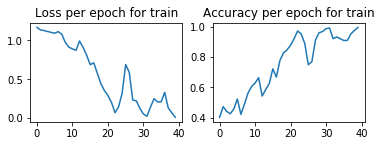

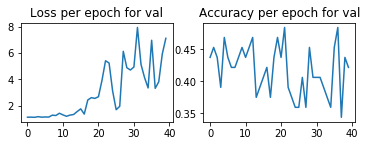

In [26]:
model_Q3p6 = Convnet5Layer()
if use_gpu:
    model_Q3p6.cuda()
    optimizer = torch.optim.SGD(model_Q3p6.parameters(), lr = 0.01, momentum=0.9)
model_Q3p6.train()   

init_weights(model_Q3p6)
model_Q3p6_ft = train_model(model_Q3p6, criterion, optimizer,
                       num_epochs=40, trainVal=['train','val'])      

In [27]:
# This is the place we predict the disease from a model trained, output for this function is 
#the target values and probabilty of each image having a disease 
def inference(model_ft,loader):
    use_gpu = 1
    model_ft.eval()
    whole_output =[]
    whole_target = []

    for valData in loader:
        data = valData['x']
        target = valData['y']
        if use_gpu:
            data = Variable(data,volatile=True).type(torch.FloatTensor).cuda()
            target = Variable(target,volatile=True).type(torch.LongTensor).cuda()
        else:
            data, target = Variable(data,volatile=True).type(torch.FloatTensor), Variable(target,volatile=True).type(torch.LongTensor)

        output =F.softmax(model_ft(data),dim=1)
        whole_output.append( output.cpu().data.numpy())
        whole_target.append( valData['y'].numpy())

    whole_output = np.concatenate(whole_output)
    whole_target = np.concatenate(whole_target)

    y_score = whole_output
    y_target = label_binarize(whole_target, classes=[0, 1, 2, 3])
    
    return y_score, y_target



In [28]:
# this function AUC of ROC for each disease seperately and also macro and micro averages,
# we will use macro average to compare different models we will train. 
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

def get_AUC(y_score, y_target,plotROC=False):
    n_classes = y_score.shape[1]

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_target[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_target.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    if plotROC:
        lw = 2
        # Plot all ROC curves
        plt.figure()
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]),
                 color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]),
                 color='navy', linestyle=':', linewidth=4)

        colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                     label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Some extension of Receiver operating characteristic to multi-class')
        plt.legend(loc="lower right")
        plt.show()

    return roc_auc


In [29]:
y_s, y_t=inference(model_Q3p6_ft,validation_loader)
r_AUC = get_AUC(y_s, y_t)
print('macro AUC for the initial model is: ', r_AUC["macro"])

macro AUC for the initial model is:  0.49382854130636383


## 3.7) Analysis of training using a CNN model(2 points)
Describe your findings. Can your network learn from 256 random samples? Does CNN model have enough capacity to learn with your choice of emprical hyperparameters?
-  If yes, how will average loss plot will change if you multiply the learning rate by 10?
-  If no, how can you increase the model capacity? Increase your model capacity and train again until you find a model with enough capacity. If the capacity increase is not sufficient to learn, think about emprical parameters you choose in designing your network and make some changes on your selection. Describe what type of changes you made to your original network and how can you manage this model to learn.

The answer varies, for learning rate increase we can expect our network to learn faster. In some cases, increasing the learning rate will result in conditions where we cannot learn at all due to loss divergence.

If we are sure about we choose sensible emprical hyperparameters, but we can not learn, this is most probably due to network capacity issues. you can mitigate this by increasing the number of hidden layer feature maps, increase the number of hidden layers and so on. However, we do not expect network capacity will be an issue for the network defined in Q3.3.

## 3.8) Hyperparameters (2 points each)
Now, we will revisit our selection of CNN model architecture, training parameters and so on: i.e. hyperparameters. In your investigations, define how you will change the hyperparameter in the light of model performance using previous hyperparameters. Provide your rationale choosing the next hyperparameter. Provide learning loss and accuracy curves, and model performance in HW2_randomValidationSet. You will use macro AUC as the performance metric for comparing CNN models for disease classification task.  Report macro AUC for each CNN model with different hyperparameters (Check http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#multiclass-settings).

### 3.8.a)
Investigate the effect of learning rate in the model performance

Results for lr = 0.1
Training complete in 4m 50s
Best val Acc: 0.437500


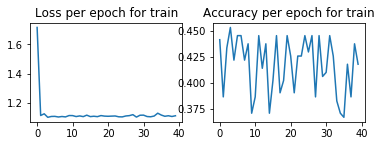

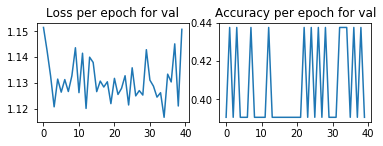

In [30]:
print('Results for lr = 0.1')
if use_gpu:
    model_Q3p6.cuda()
    optimizer = torch.optim.SGD(model_Q3p6.parameters(), lr = 0.1, momentum=0.9)
model_Q3p6.train()    

init_weights(model_Q3p6)
model_Q3p8a = train_model(model_Q3p6, criterion, optimizer,
                       num_epochs=40, trainVal=['train','val'],verbose=False)  

y_s, y_t=inference(model_Q3p8a,validation_loader)
r_AUClr1e1 = get_AUC(y_s, y_t)


Results for lr = 0.001
Training complete in 4m 51s
Best val Acc: 0.500000


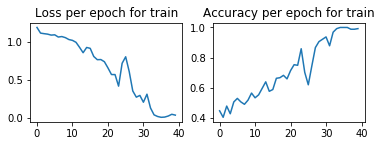

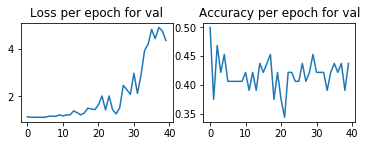

In [31]:

print('Results for lr = 0.001')
if use_gpu:
    model_Q3p6.cuda()
    optimizer = torch.optim.SGD(model_Q3p6.parameters(), lr = 0.001, momentum=0.9)
model_Q3p6.train()    

init_weights(model_Q3p6)
model_Q3p8a2 = train_model(model_Q3p6, criterion, optimizer,
                       num_epochs=40, trainVal=['train','val'],verbose=False)  

y_s, y_t=inference(model_Q3p8a2,validation_loader)
r_AUClr1e3 = get_AUC(y_s, y_t)

In [32]:
print('macro AUC for the model with lr = 0.1 is: ', r_AUClr1e1["macro"])
print('macro AUC for the model with lr = 0.01 is: ', r_AUC["macro"])
print('macro AUC for the model with lr = 0.001 is: ', r_AUClr1e3["macro"])

macro AUC for the model with lr = 0.1 is:  0.5
macro AUC for the model with lr = 0.01 is:  0.49382854130636383
macro AUC for the model with lr = 0.001 is:  0.6184600334701141


### 3.8.b)
We choose SGD with momentum as an optimizer. Investigate the effect of at least two other optimizers in model performance.

Results for Adam Optimizer
Training complete in 4m 51s
Best val Acc: 0.546875


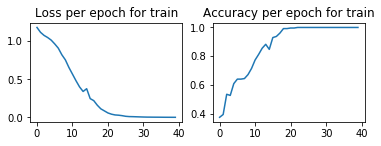

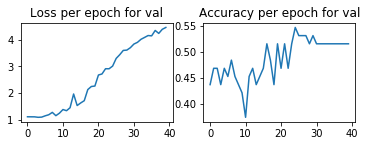

In [33]:
print('Results for Adam Optimizer')
if use_gpu:
    model_Q3p6.cuda()
    optimizer = torch.optim.Adam(model_Q3p6.parameters(), lr = 0.0001)
model_Q3p6.train()    

init_weights(model_Q3p6)
model_Q3p8b = train_model(model_Q3p6, criterion, optimizer,
                       num_epochs=40, trainVal=['train','val'],verbose=False)  

y_s, y_t=inference(model_Q3p8b,validation_loader)
r_AUCAdam = get_AUC(y_s, y_t)

Results for RMSprop Optimizer
Training complete in 4m 52s
Best val Acc: 0.500000


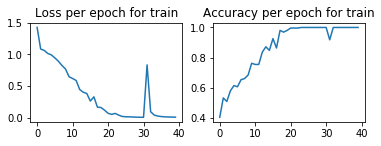

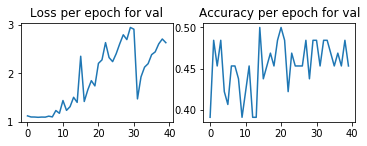

In [34]:
print('Results for RMSprop Optimizer')
if use_gpu:
    model_Q3p6.cuda()
    optimizer = torch.optim.RMSprop(model_Q3p6.parameters(), lr = 0.0001)
model_Q3p6.train()    

init_weights(model_Q3p6)
model_Q3p8b2 = train_model(model_Q3p6, criterion, optimizer,
                       num_epochs=40, trainVal=['train','val'],verbose=False)  

y_s, y_t=inference(model_Q3p8b2,validation_loader)
r_AUCRMSprop = get_AUC(y_s, y_t)

In [35]:
print('macro AUC for the model with SGD is: ', r_AUC["macro"])
print('macro AUC for the model with Adam is: ', r_AUCAdam["macro"])
print('macro AUC for the model with RMSprop is: ', r_AUCRMSprop["macro"])

macro AUC for the model with SGD is:  0.49382854130636383
macro AUC for the model with Adam is:  0.703316588081373
macro AUC for the model with RMSprop is:  0.6872338063668709


### 3.8.c)
Investigate the effect of the dimension of the fully connected layer in the model performance.

Results for the model with 4 nodes in FC 
Training complete in 4m 58s
Best val Acc: 0.531250


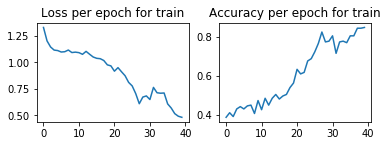

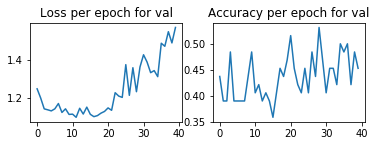

In [36]:
ROC_FC=[]
fc_dim=[4,16,32]
fc=0
print('Results for the model with %d nodes in FC '%fc_dim[fc])
model_FC = Convnet5Layer(fc_dim[fc])
if use_gpu:
    model_FC.cuda()
    optimizer = torch.optim.SGD(model_FC.parameters(), lr = 0.01, momentum=0.9)
model_FC.train()    

init_weights(model_FC)
model_Q3p8c = train_model(model_FC, criterion, optimizer,
                       num_epochs=40, trainVal=['train','val'],verbose=False)  

y_s, y_t=inference(model_Q3p8c,validation_loader)
r_AUC_FC = get_AUC(y_s, y_t)
ROC_FC.append(r_AUC_FC['macro'])    

Results for the model with 16 nodes in FC 
Training complete in 5m 7s
Best val Acc: 0.546875


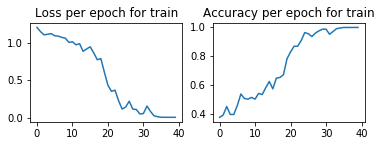

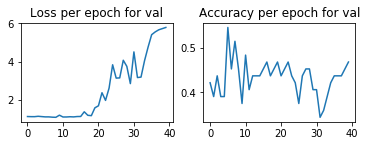

In [37]:
fc=1
print('Results for the model with %d nodes in FC '%fc_dim[fc])
model_FC = Convnet5Layer(fc_dim[fc])
if use_gpu:
    model_FC.cuda()
    optimizer = torch.optim.SGD(model_FC.parameters(), lr = 0.01, momentum=0.9)
model_FC.train()    

init_weights(model_FC)
model_Q3p8c2 = train_model(model_FC, criterion, optimizer,
                       num_epochs=40, trainVal=['train','val'],verbose=False)  

y_s, y_t=inference(model_Q3p8c2,validation_loader)
r_AUC_FC = get_AUC(y_s, y_t)
ROC_FC.append(r_AUC_FC['macro']) 

Results for the model with 32 nodes in FC 
Training complete in 5m 7s
Best val Acc: 0.515625


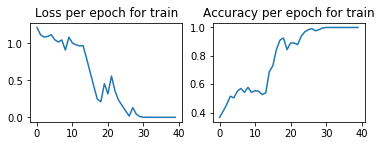

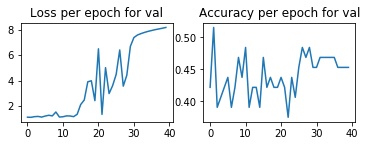

In [38]:
fc=2
print('Results for the model with %d nodes in FC '%fc_dim[fc])
model_FC = Convnet5Layer(fc_dim[fc])
if use_gpu:
    model_FC.cuda()
    optimizer = torch.optim.SGD(model_FC.parameters(), lr = 0.01, momentum=0.9)
model_FC.train()    

init_weights(model_FC)
model_Q3p8c3 = train_model(model_FC, criterion, optimizer,
                       num_epochs=40, trainVal=['train','val'],verbose=False)  

y_s, y_t=inference(model_Q3p8c3,validation_loader)
r_AUC_FC = get_AUC(y_s, y_t)
ROC_FC.append(r_AUC_FC['macro']) 

In [39]:
for fi in range(3):
    print('macro AUC for the model with %f nodes in FC: %f'%(fc_dim[fi],ROC_FC[fi]))

macro AUC for the model with 4.000000 nodes in FC: 0.653591
macro AUC for the model with 16.000000 nodes in FC: 0.704761
macro AUC for the model with 32.000000 nodes in FC: 0.628844


### 3.8.d)
Investigate the effect of the batch size in learning speed and the model performance.

Results for Batch size 16
Training complete in 5m 9s
Best val Acc: 0.515625


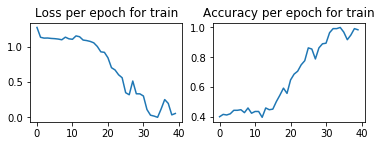

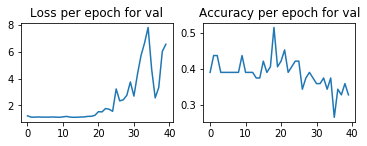

In [40]:
print('Results for Batch size 16')
model = Convnet5Layer(32)
BATCH_SIZE = 16
## data loaders
train_loader.batch_size = BATCH_SIZE
validation_loader.batch_size = BATCH_SIZE

if use_gpu:
    model_Q3p6.cuda()
    optimizer = torch.optim.SGD(model_Q3p6.parameters(), lr = 0.01, momentum=0.9)
model_Q3p6.train()    

init_weights(model_Q3p6)
model_Q3p8d = train_model(model_Q3p6, criterion, optimizer,
                       num_epochs=40, trainVal=['train','val'],verbose=False)  

y_s, y_t=inference(model_Q3p8d,validation_loader)
r_AUCBatch16 = get_AUC(y_s, y_t)

Results for Batch size 8 
Training complete in 5m 9s
Best val Acc: 0.515625


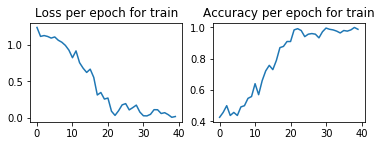

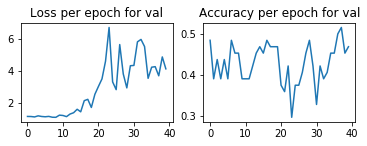

In [41]:
print('Results for Batch size 8 ')

BATCH_SIZE = 8
## data loaders
train_loader.batch_size = BATCH_SIZE
validation_loader.batch_size = BATCH_SIZE

if use_gpu:
    model_Q3p6.cuda()
    optimizer = torch.optim.SGD(model_Q3p6.parameters(), lr = 0.01, momentum=0.9)
model_Q3p6.train()    

init_weights(model_Q3p6)
model_Q3p8d2 = train_model(model_Q3p6, criterion, optimizer,
                       num_epochs=40, trainVal=['train','val'],verbose=False)  

y_s, y_t=inference(model_Q3p8d2,validation_loader)
r_AUCBatch8 = get_AUC(y_s, y_t)

Results for Batch size 1 
Training complete in 5m 20s
Best val Acc: 0.500000


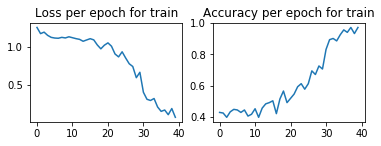

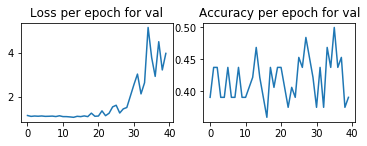

In [42]:

print('Results for Batch size 1 ')

BATCH_SIZE = 1
## data loaders
train_loader.batch_size = BATCH_SIZE
validation_loader.batch_size = BATCH_SIZE

if use_gpu:
    model_Q3p6.cuda()
    optimizer = torch.optim.SGD(model_Q3p6.parameters(), lr = 0.01, momentum=0.9)
model_Q3p6.train()    

init_weights(model_Q3p6)
model_Q3p8d3 = train_model(model_Q3p6, criterion, optimizer,
                       num_epochs=40, trainVal=['train','val'],verbose=False)  

y_s, y_t=inference(model_Q3p8d3,validation_loader)
r_AUCBatch1 = get_AUC(y_s, y_t)

In [43]:

print('macro AUC for the model with Batch size 16 is: ', r_AUCBatch16["macro"])
print('macro AUC for the model with Batch size 8 is: ', r_AUCBatch8["macro"])
print('macro AUC for the model with Batch size 1 is: ', r_AUCBatch1["macro"])

macro AUC for the model with Batch size 16 is:  0.6384916473411097
macro AUC for the model with Batch size 8 is:  0.6787143814220427
macro AUC for the model with Batch size 1 is:  0.5571760230261574


## 3.9) Train the network on the whole dataset (4 points)
After question 3.7., you should have a network which has enough capacity to learn and from question 3.8 you know which hyperparameters perform better on a subset of test and validation set. Train your network on the whole train set (HW2_trainSet.csv) and check the validation loss on the whole validation set (HW2_validationSet.csv) in each epoch. Plot average loss and accuracy on train and validation sets. Describe your findings. Do you see overfitting or underfitting to train set? What else you can do to mitigate it?

Training complete in 204m 30s
Best val Acc: 33.000000


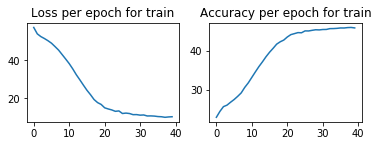

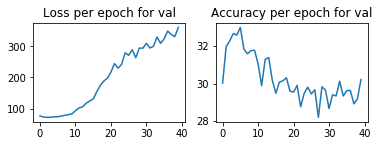

In [44]:
# we are now using data loaders from the whole train and validation sets. 
BATCH_SIZE = 8

chestXray_TrainData = ChestXrayDataset(csv_file='HW2_TrainSet.csv',
                                    root_dir='images')
train_loader = DataLoader(chestXray_TrainData, batch_size=BATCH_SIZE,
                        shuffle=True, num_workers=4)


chestXray_ValidationData = ChestXrayDataset(csv_file='HW2_ValidationSet.csv',
                                    root_dir='images')
validation_loader = DataLoader(chestXray_ValidationData, batch_size=BATCH_SIZE,
                        shuffle=True, num_workers=4)

model = Convnet5Layer(16)
# Here you can use hyperparameters from our investigation on 3.8
if use_gpu:
    model.cuda()
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)
model.train()    

init_weights(model)
model_full = train_model(model, criterion, optimizer,
                       num_epochs=40, trainVal=['train','val'],verbose=False)  


#!!! since we havent learned regularization and our network has high capacity 
# we will see overfitting on this part of the homework as well. We may not obtain a
# model which is generalizable but it is OK for this homework


## 3.10) Analysis  of the results (4 points)
Using the validation loss to choose the model (lets name it as baseline model) which learns from train data and generalizes well to the validation set. Using this model plot confusion matrix and ROC curve for your multi-class CNN disease classifier on the test set (HW2_testSet.csv). Report macro AUC for this CNN model as the performance metric. 

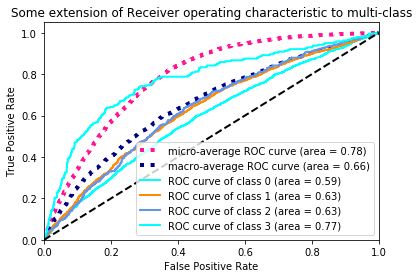

macro AUC for the model trained on full data is :  0.6551699836905827


In [45]:
chestXray_TestData = ChestXrayDataset(csv_file='HW2_TestSet.csv',
                                    root_dir='images')
test_loader = DataLoader(chestXray_ValidationData, batch_size=BATCH_SIZE,
                        shuffle=True, num_workers=8)

y_s, y_t=inference(model_full,test_loader)
r_AUC_wholeSet = get_AUC(y_s, y_t,True)
print('macro AUC for the model trained on full data is : ', r_AUC_wholeSet['macro'])

Confusion matrix, without normalization
[[ 898  803    0    0]
 [ 671 1214    0    0]
 [ 279  176    0    0]
 [ 119  121    0    0]]


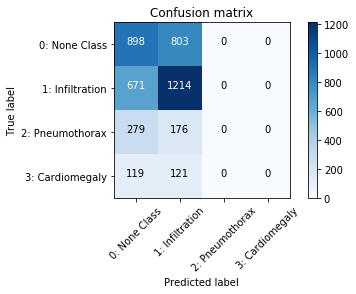

In [46]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_t.dot([0,1,2,3]), np.argmax(y_s,axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['0: None Class','1: Infiltration','2: Pneumothorax','3: Cardiomegaly']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

You can see the effect of imbalanced dataset and poor generalization in Confusion matrix. The network only predicts any case as a case of 0 and 1. 

## 3.11) Understanding the network (6 points)
Using the best performing model (choose from models developed in  3.10., and 3.12.(in case you work on it)), we will figure out where our network gathers infomation to decide the class for the image. One way of doing this is to oclude parts of the image and run through your network. By changing the location of the ocluded region we can visualize the probability of image being in one class as a 2-dimensional heat map. Using the best performing model, provide the heat map of the following images: HW2_visualize.csv. Do the heap map and bounding box for pathologies provide similar information? Describe your findings.
Reference: https://arxiv.org/pdf/1311.2901.pdf

In [47]:
# Code is taken from: https://github.com/thesemicolonguy/convisualize_nb/blob/master/cnn-visualize.ipynb 
# with minor modifications

def make_heatmap(image, true_class, model_hm, k=8, stride=8): 
    """
    Input image is of size (1, c, w, h) typically (1, 1, 224, 224) for our networks using x-rays
    true_class is a number corresponding to disease classes
    k in the filter size (c, k, k)
    """
    heatmap = torch.zeros(int(((image.shape[2]-k)/stride)+1), int(((image.shape[3]-k)/stride)+1))
    
    # data transfrom to zero mean unit variance
    image = (image - image.mean()) / image.std()
    data = torch.autograd.Variable(torch.from_numpy(image),volatile=True).type(torch.FloatTensor).cuda()

    
    i = 0
    a = 0
    while i<=image.shape[3]-k:
        j = 0 
        b = 0
        while j<=image.shape[2]-k:
            h_filter = torch.autograd.Variable(torch.ones(image.shape)).cuda()
            h_filter[:,:,j:j+k, i:i+k] = 0

            temp_image = data * h_filter
            temp_softmax = model_hm(temp_image)
            temp_softmax = torch.nn.functional.softmax(temp_softmax,dim=1).data[0]
            heatmap[a][b] = temp_softmax[true_class]
            j += stride
            b += 1
        i += stride
        a += 1
    
    image = image.squeeze()
    
    true_image = image.transpose(0,1)

    # Plot both images
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (20, 20)
    
    a = fig.add_subplot(1,2,1)
    imgplot = plt.imshow(true_image)
    a.add_patch(patches.Rectangle((bbox['x'],bbox['y']),bbox['w'],bbox['h'],linewidth=1,edgecolor='r',facecolor='none'))
    plt.title('Original Image')
    plt.axis('off') 

    
    a = fig.add_subplot(1,2,2)
    imgplot = plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off') 
    #plt.clim(0,1)
    plt.show()
    
    return heatmap

00000661_000.png Cardiomegaly {'w': 548.8813558999999, 'y': 437.45989469999995, 'x': 298.84745760000004, 'h': 428.4745763}


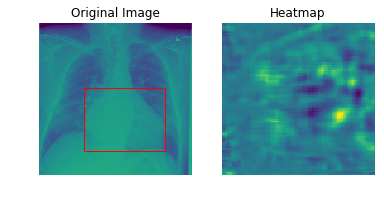

00002176_007.png Pneumothorax {'w': 107.2761905, 'y': 188.5460317, 'x': 258.9798942, 'h': 115.9449735}


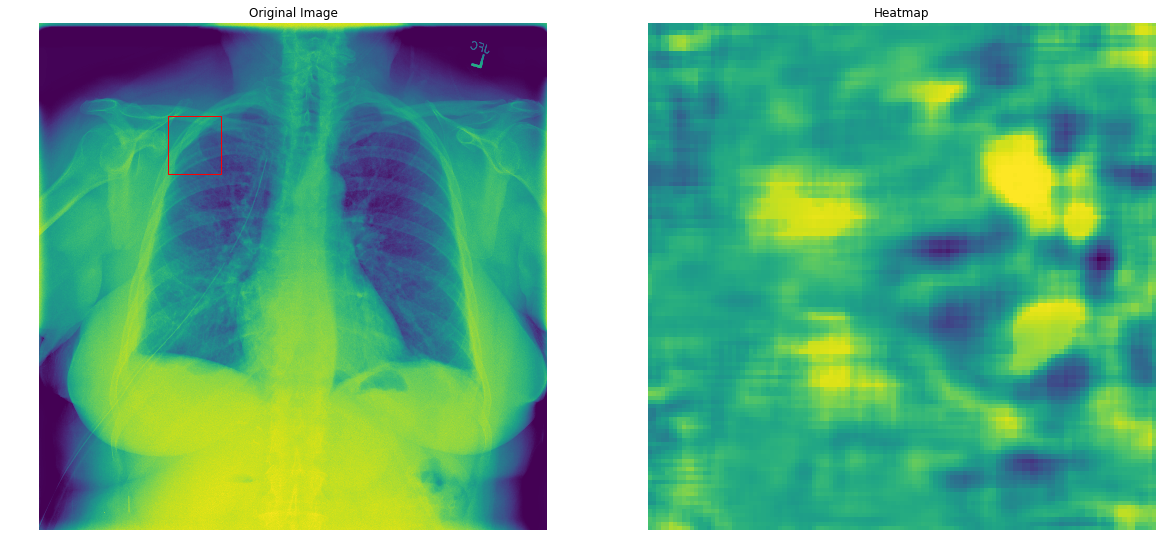

00002435_005.png Cardiomegaly {'w': 401.3559322, 'y': 480.27118640000003, 'x': 362.84745760000004, 'h': 298.3050847}


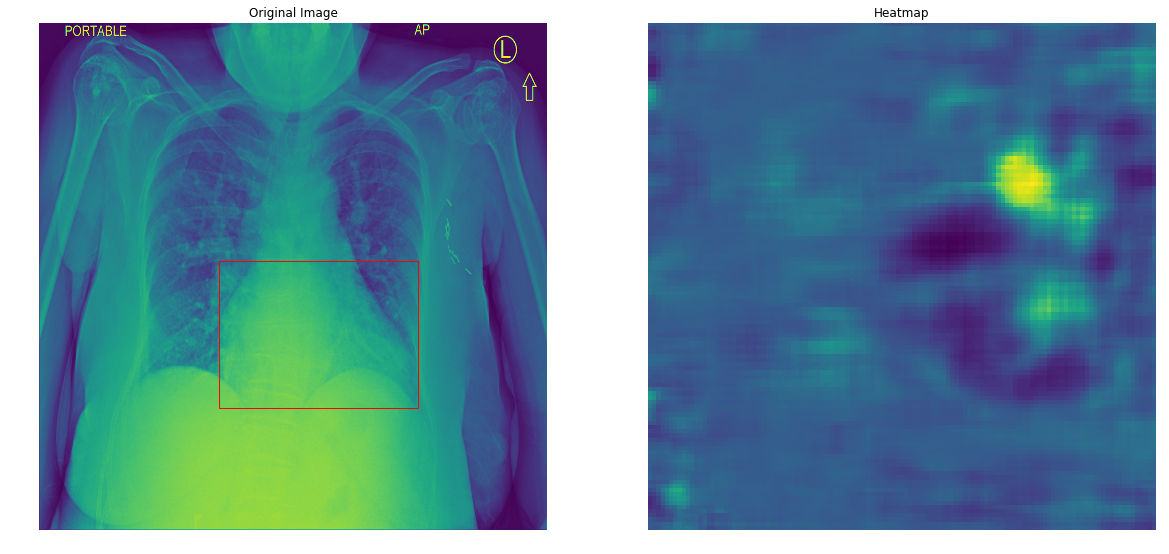

00011124_000.png Infiltrate {'w': 114.8613757, 'y': 482.2010581999999, 'x': 241.642328, 'h': 126.7809524}


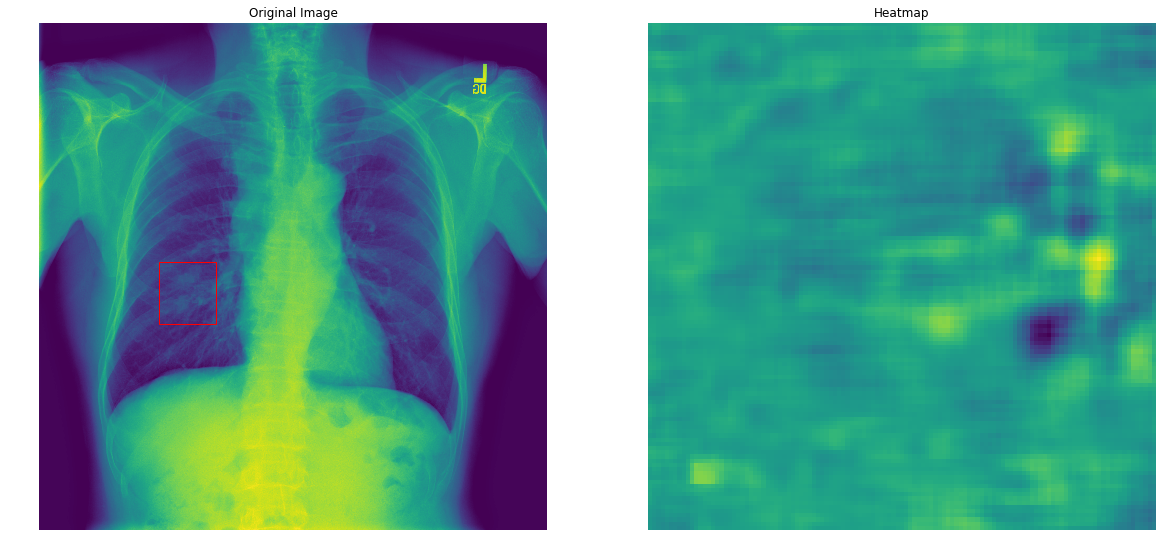

In [48]:
import pandas as pd
from skimage import io
import os
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
model_full.eval()
df = pd.read_csv('HW2_visualize.csv')

for ddx in range(4):
    img_name = os.path.join('images', df.iloc[ddx, 0])
    bbox= {'x':df.iloc[ddx,2],'y':df.iloc[ddx,3],'w':df.iloc[ddx,4],'h':df.iloc[ddx,5]}
    print(df.iloc[ddx,0],df.iloc[ddx,1],bbox)

    image = io.imread(img_name)
    image = image[np.newaxis,np.newaxis,:]

    if df.iloc[ddx,1] == 'Infiltrate':
        true_class = 1
    elif df.iloc[ddx,1] == 'Pneumothorax':
        true_class = 2
    elif df.iloc[ddx,1] == 'Cardiomegaly':
        true_class = 3
    else:
        true_class = 0

    heatmap = make_heatmap(image, true_class, model_full.cuda(), k=64, stride=8 )

## 3.11) Your CNN architecture design (Bonus Question 1: 12 points)
Be creative and design your own CNN model. This model can be some variation of the baseline model using the information from hyperparameter search or it can be a totally new architecture. Use the knowledge you gained from previous questions to design your network. Because of this reason, your network is expected to provide superior results. After you trained your network on the whole train set, choose the best performaing model using the loss on the whole validation set. Provide the confusion matrix, ROC curves and macro AUC for your best performing model using the whole test set. Explain your design criteria and why your performance is better compared to the baseline model. Some architecture change suggestions: convolution filter dimensions, dilated convolutions, network without a fully connected layer, deeper networks, data augmentation ...     

Various answers are acceptable: Our learning is fast but not generalizable due to overfitting. You can reduce overfitting by reducing the number of paramaters, incorporating data augmentation, using techniques like weight decay and dropout also we can use weighted cross-entropy for our inbalanced dataset. WE will cover those approaches after the spring break. The main purpose for this homework is to enable you understand the underlying behavior of convolutional neural networks, and have the tools ready for further development. We will use/revisit some of the tools that you developed here in HW4. 